iteration 1, shift 1.3739436600956463
iteration 2, shift 0.44902368724749187
iteration 3, shift 0.17264056830539104
iteration 4, shift 0.07225504862957297
iteration 5, shift 0.016877867562335995
iteration 6, shift 0.02077093731718544
iteration 7, shift 0.014714746467339265
iteration 8, shift 0.017866933235739724
iteration 9, shift 0.033124907977736345
iteration 10, shift 0.025779053388449966
iteration 11, shift 0.008092295963131926
iteration 12, shift 0.007855577626278412
iteration 13, shift 0.0
iteration 14, shift 0.0
iteration 15, shift 0.0
iteration 16, shift 0.0
iteration 17, shift 0.0
iteration 18, shift 0.0
iteration 19, shift 0.0
iteration 20, shift 0.0
iteration 21, shift 0.0
iteration 22, shift 0.0
iteration 23, shift 0.0
iteration 24, shift 0.0
iteration 25, shift 0.0
iteration 26, shift 0.0
iteration 27, shift 0.0
iteration 28, shift 0.0
iteration 29, shift 0.0
iteration 30, shift 0.0


Text(0, 0.5, 'Log Likelihood')

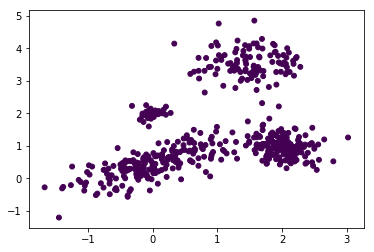

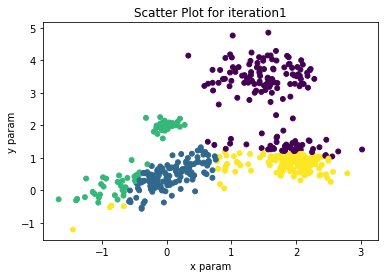

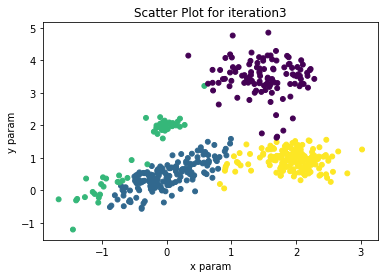

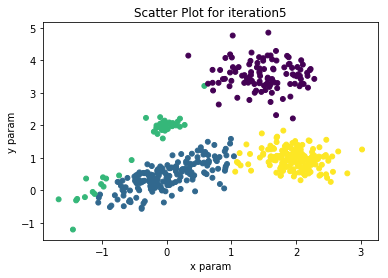

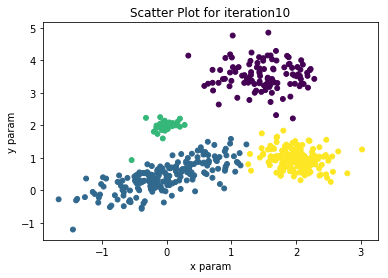

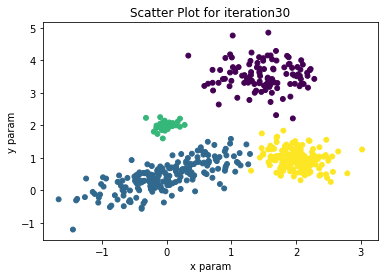

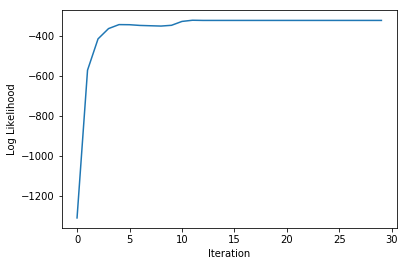

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

X_train = np.loadtxt('gmm.txt')
xs=X_train[:,0]
ys=X_train[:,1]

org_labels = ([1] * 500)  #assigning label 1 to each data
org_data = X_train


def pdf_Calc(val,mu,sig,lam):
    den=(2*np.pi*(np.linalg.det(sig))**0.5)
    inv_sig=np.linalg.inv(sig)
    temp = np.array([val[0]-mu[0],val[1]-mu[1]])
    c = np.matmul(temp,inv_sig)
    d = np.dot(c,temp)
    P_x = lam*(np.exp(-0.5*d))/den
    return P_x

def expectation(data,labels,param1,param2):
    log_likelihood=0
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]
        prob_cluster1 = pdf_Calc([x, y], list(param1['mu1']), list(param1['sigma1']), param2[0] )
        prob_cluster2 = pdf_Calc([x, y], list(param1['mu2']), list(param1['sigma2']), param2[1] )
        prob_cluster3 = pdf_Calc([x, y], list(param1['mu3']), list(param1['sigma3']), param2[2] )
        prob_cluster4 = pdf_Calc([x, y], list(param1['mu4']), list(param1['sigma4']), param2[3] )
        temp=[prob_cluster1,prob_cluster2,prob_cluster3,prob_cluster4]
        temp2=sorted(temp)

        #depending on which cluster gives highest probability density assign labels
        if temp2[3]==prob_cluster1:  
            labels[i] = 1
            log_likelihood+=np.log(prob_cluster1/param2[0]);
        if temp2[3]==prob_cluster2:
            labels[i] = 2
            log_likelihood+=np.log(prob_cluster2/param2[1]);
        if temp2[3]==prob_cluster3:
            labels[i] = 3
            log_likelihood+=np.log(prob_cluster3/param2[2]);
        if temp2[3]==prob_cluster4:
            labels[i] = 4
            log_likelihood+=np.log(prob_cluster4/param2[0]);

    return (labels,log_likelihood)




def maximization(data,labels, param1,param2):
    
    g=np.array(data)
    h=np.array(labels)
    
    #index of different labels stored in k l m n 
    k=np.where(h==1)[0]
    l=np.where(h==2)[0]
    m=np.where(h==3)[0]
    n=np.where(h==4)[0]
        
    
    points_cluster1 = g[k,:]  
    points_cluster2 = g[l,:]
    points_cluster3 = g[m,:]  
    points_cluster4 = g[n,:] 
    
    fraction_cluster1 = len(points_cluster1) / float(len(data))
    fraction_cluster2 = len(points_cluster2) / float(len(data))
    fraction_cluster3 = len(points_cluster3) / float(len(data))
    fraction_cluster4 = 1 - fraction_cluster1-fraction_cluster2-fraction_cluster3
    
    param2 = [fraction_cluster1, fraction_cluster2,fraction_cluster3,fraction_cluster4 ]
    param1['mu1'] = [0,0]
    param1['mu2'] = [0,0]
    param1['mu3'] = [0,0]
    param1['mu4'] = [0,0]
    param1['sigma1'] = [ [1, 0], [0, 1] ]
    param1['sigma2'] = [ [1, 0], [0, 1] ]
    param1['sigma3'] = [ [1, 0], [0, 1] ]
    param1['sigma4'] = [ [1, 0], [0, 1] ]
    #checking for Nan
    
    if(len(points_cluster1)!=0):
        param1['mu1'] = [points_cluster1[:,0].mean(), points_cluster1[:,1].mean()]
        a=np.cov(points_cluster1[:,0],points_cluster1[:,1])
        param1['sigma1'] = [[a[0,0],a[0,1]],[a[1,0],a[1,1]]]
    if(len(points_cluster2)!=0):   
        param1['mu2'] = [points_cluster2[:,0].mean(), points_cluster2[:,1].mean()]
        a=np.cov(points_cluster2[:,0],points_cluster2[:,1])
        param1['sigma2'] =[[a[0,0],a[0,1]],[a[1,0],a[1,1]]]
    if(len(points_cluster3)!=0):
        param1['mu3'] = [points_cluster3[:,0].mean(), points_cluster3[:,1].mean()]
        a=np.cov(points_cluster3[:,0],points_cluster3[:,1])
        param1['sigma3'] = [[a[0,0],a[0,1]],[a[1,0],a[1,1]]]
    if(len(points_cluster4)!=0):
        param1['mu4'] = [points_cluster4[:,0].mean(), points_cluster4[:,1].mean()]  
        a=np.cov(points_cluster4[:,0],points_cluster4[:,1])
        param1['sigma4'] =  [[a[0,0],a[0,1]],[a[1,0],a[1,1]]]
    
    return (param1,param2)




def distance(old_params1,old_params2, new_params1,new_params2):
    dist = 0
    for param in ['mu1', 'mu2']:
        for i in range(len(old_params1)):
            dist += (old_params1[param][i] - new_params1[param][i]) ** 2
            dist += (old_params2[i] - new_params2[i]) ** 2 

    return dist ** 0.5


fig = plt.figure()
plt.scatter(org_data[:,0], org_data[:,1], 24, c=org_labels)
fig.savefig("true-values.png")


minx=min(org_data[:,0]);
maxx=max(org_data[:,0]);
miny=min(org_data[:,1]);
maxy=max(org_data[:,1]);

mux_init = np.random.uniform(minx,maxx, 4);
muy_init = np.random.uniform(miny,maxy, 4);
#Pearson correlation coefficient should lie with +1 and -1 (ro)
#sigma to take value between 0,1
sigx_init = np.random.uniform(0,1, 4);
sigy_init = np.random.uniform(0,1, 4);
ro = np.random.uniform(-1,1, 4);
sigxy_init = np.multiply(sigx_init,ro);
sigxy_init = np.multiply(sigy_init,sigxy_init);

#r=0.2
init1 = {'mu1': [mux_init[0],muy_init[0]],
         'sigma1': [ [sigx_init[0],sigxy_init[0]], [sigxy_init[0],sigy_init[0]] ],
         'mu2': [mux_init[1],muy_init[1]],
         'sigma2':  [ [sigx_init[1],sigxy_init[1]], [sigxy_init[1],sigy_init[1]] ],
         'mu3': [mux_init[2],muy_init[2]],
         'sigma3': [ [sigx_init[2],sigxy_init[2]], [sigxy_init[2],sigy_init[2]] ],
         'mu4': [mux_init[3],muy_init[3]],
         'sigma4': [ [sigx_init[3],sigxy_init[3]], [sigxy_init[3],sigy_init[3]] ],
                    
        }

init2 = np.random.uniform(0,100,4) #lambda 
init2 = init2/(sum(init2))
shift = 1000 # changed
iters = 0
data=org_data.copy()  ## can change data now
labels=org_labels.copy()  ## can change labels now

for i in range(len(labels)):
    labels[i]=random.randint(1,4)    # randomly assigning label 1 to 4 

param1= pd.DataFrame(init1)
param2=init2

log_likelihood=[0]*30;
while (iters<30):
  
  # E-step  
  new_labels,log_likelihood[iters] = expectation(data,labels, param1,param2)
  iters += 1
    
  param3=param1.copy()  #backing up
  param4=param2.copy()  
  new_param1,new_param2 = maximization(data, new_labels, param3,param4)
  shift = distance(param1,param2, new_param1,new_param2)
  

  print("iteration {}, shift {}".format(iters, shift))

  # update labels and params for the next iteration
  labels = new_labels
  param1 = new_param1
  param2 = new_param2
  if(iters==1) or (iters==3) or (iters==5) or (iters==10) or (iters==30):
      fig = plt.figure()
      plt.scatter(data[:,0], data[:,1], 24, c=labels)
      plt.xlabel('x param')
      plt.ylabel('y param')
      plt.title('Scatter Plot for iteration%i' %iters)
      fig.savefig("iteration{}.png".format(iters))

fig = plt.figure()
plt.plot(log_likelihood)
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
